In [2]:
import os
from pathlib import Path
import imageio.v2 as imageio
import matplotlib.pyplot as plt

from src.visualization.render_mp4 import create_mp4_jupyter

In [ ]:
# base_img_path = Path(f"/home/anthony/repos/research/robust-rearrangement/src/sim2real") / "output" / "camera"
base_img_path = Path(f"/home/anthony/repos/research/robust-rearrangement/src/sim2real") / "output" / "wrist_camera"
# img_paths = sorted([(base_img_path / p) for p in os.listdir(base_img_path) if 'old' not in p])
img_paths = sorted([(base_img_path / p) for p in os.listdir(base_img_path) if 'old' not in p and 'substeps_6' in p])
# print(f'Image paths: {img_paths}')

all_np_images = []
for img_path in img_paths:
    print(f'Image path: {img_path}')

    # get paths and values
    paths = os.listdir(img_path)
    path_nums = [int(val.split('_')[1]) for val in paths]

    # sort
    paths_with_nums = zip(paths, path_nums)
    paths_with_nums = sorted(paths_with_nums, key=lambda x: x[1])
    paths = [val[0] for val in paths_with_nums]

    # extract (every 10, too many frames)
    np_images = [imageio.imread((img_path / path)) for path in paths]

    all_np_images.append(np_images)

In [ ]:
for i, np_images in enumerate(all_np_images):
    # fname = f'videos/isaac_sim{i}_front.mp4'
    fname = f'videos/isaac_sim{i}_wrist.mp4'
    create_mp4_jupyter(np_images, fname, fps=20) 

In [ ]:
fig, ax = plt.subplots(4, 4)
# print(ax, len(ax), len(ax[0]))
fig.set_size_inches(14, 10)
for i in range(len(all_np_images) - 1):
    first_img = all_np_images[i][0]

    ii = int(i % 4)
    jj = int(i // 4)
    # print(f'{ii}, {jj}')
    ax[ii, jj].imshow(first_img)
    ax[ii, jj].set_xticklabels([])
    ax[ii, jj].set_yticklabels([])
plt.show()

In [ ]:
base_img_path = Path(f"/home/anthony/repos/research/robust-rearrangement/src/sim2real") / "output" / "camera"
img_paths = sorted([(base_img_path / p) for p in os.listdir(base_img_path)])
# print(f'Image paths: {img_paths}')

all_np_images = []
n_substeps = []
for img_path in img_paths:
    print(f'Image path: {img_path}')

    # get paths and values
    paths = os.listdir(img_path)
    path_nums = [int(val.split('_')[1]) for val in paths]

    # sort
    paths_with_nums = zip(paths, path_nums)
    paths_with_nums = sorted(paths_with_nums, key=lambda x: x[1])
    paths = [val[0] for val in paths_with_nums]

    # extract (every 10, too many frames)
    np_images = [imageio.imread((img_path / path)) for path in paths]

    all_np_images.append(np_images)
    substeps = int(str(img_path).split('_')[-1])
    n_substeps.append(substeps)
    print(f'Sub steps: {substeps}')

In [ ]:
for i, np_images in enumerate(all_np_images):
    fname = f'videos/isaac_sim_substeps_{n_substeps[i]}_front.mp4'
    create_mp4_jupyter(np_images, fname, fps=20) 

In [ ]:
base_img_path = Path(f"/home/anthony/repos/research/robust-rearrangement/src/sim2real") / "output" / "wrist_camera"
img_paths = sorted([(base_img_path / p) for p in os.listdir(base_img_path)])
# print(f'Image paths: {img_paths}')

all_np_images = []
n_substeps = []
for img_path in img_paths:
    print(f'Image path: {img_path}')

    # get paths and values
    paths = os.listdir(img_path)
    path_nums = [int(val.split('_')[1]) for val in paths]

    # sort
    paths_with_nums = zip(paths, path_nums)
    paths_with_nums = sorted(paths_with_nums, key=lambda x: x[1])
    paths = [val[0] for val in paths_with_nums]

    # extract (every 10, too many frames)
    np_images = [imageio.imread((img_path / path)) for path in paths]

    all_np_images.append(np_images)
    substeps = int(str(img_path).split('_')[-1])
    n_substeps.append(substeps)

In [ ]:
for i, np_images in enumerate(all_np_images):
    fname = f'videos/isaac_sim_substeps_{n_substeps[i]}_wrist.mp4'
    create_mp4_jupyter(np_images, fname, fps=20)

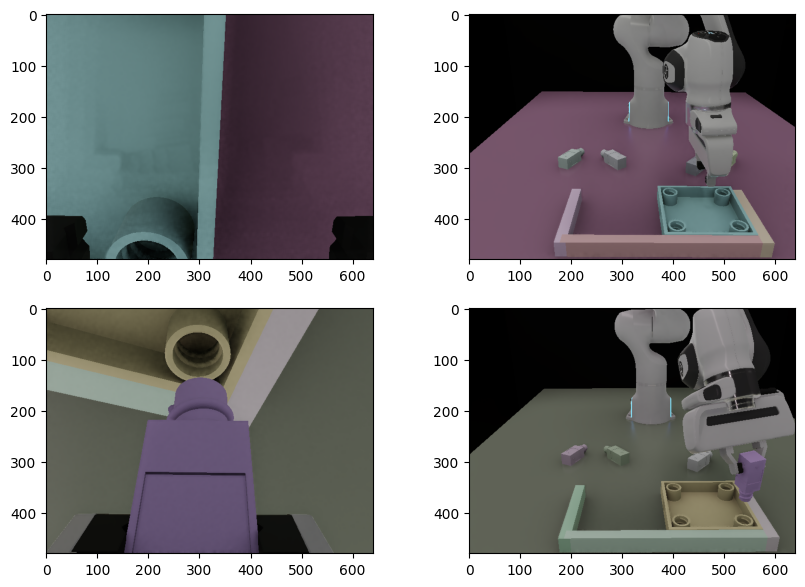

In [15]:
import os
from src.visualization.render_mp4 import pickle_data, unpickle_data
# base_path = Path(f"{os.getenv('RARL_SOURCE_DIR')}/sim2real/test_rerender")
# base_path = Path(f"{os.getenv('RARL_SOURCE_DIR')}/sim2real/test_rerender/one_leg/med_base_base_copy_0")
# base_path = Path(f"{os.getenv('RARL_SOURCE_DIR')}/sim2real/test_rerender/one_leg/med_base_base_copy_1")
# base_path = Path(f"{os.getenv('RARL_SOURCE_DIR')}/sim2real/test_rerender/one_leg/med_full_full_copy_0")
base_path = Path(f"{os.getenv('RARL_SOURCE_DIR')}/sim2real/test_rerender/one_leg/med_full_full_diffparts_copy_0")
pkl_paths = os.listdir(base_path)
pkl_path = base_path / pkl_paths[0]
data = unpickle_data(pkl_path)

obs = data["observations"][100]
obs2 = data["observations"][250]

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 7)
ax[0, 0].imshow(obs['color_image1'])
ax[0, 1].imshow(obs['color_image2'])
ax[1, 0].imshow(obs2['color_image1'])
ax[1, 1].imshow(obs2['color_image2'])
plt.show()

In [15]:

# from src.data_processing.utils import resize

front_img_path = Path(f"/home/anthony/repos/research/robust-rearrangement/src/sim2real") / "output" / "camera"
wrist_img_path = Path(f"/home/anthony/repos/research/robust-rearrangement/src/sim2real") / "output" / "wrist_camera"

front_img_paths = sorted([(front_img_path / p) for p in os.listdir(front_img_path) if 'domain_rand' in p])
wrist_img_paths = sorted([(wrist_img_path / p) for p in os.listdir(wrist_img_path) if 'domain_rand' in p])
print(f'front paths: {front_img_paths}')
print(f'wrist paths: {wrist_img_paths}')

def get_np_imgs(img_path):
    # get paths and values
    paths = os.listdir(img_path)
    path_nums = [int(val.split('_')[1]) for val in paths]

    # sort
    paths_with_nums = zip(paths, path_nums)
    paths_with_nums = sorted(paths_with_nums, key=lambda x: x[1])
    paths = [val[0] for val in paths_with_nums]

    # extract (every 10, too many frames)
    np_images = [imageio.imread((img_path / path)) for path in paths]
    return np_images

for i in range(len(front_img_paths)):
    front_np_images = get_np_imgs(front_img_paths[i])
    wrist_np_images = get_np_imgs(wrist_img_paths[i])

    front_fname = f'videos/isaac_sim_rand_front_sub{i}.mp4'
    wrist_fname = f'videos/isaac_sim_rand_wrist_sub{i}.mp4'
    create_mp4_jupyter(front_np_images, front_fname, fps=20)
    create_mp4_jupyter(wrist_np_images, wrist_fname, fps=20)

front paths: [PosixPath('/home/anthony/repos/research/robust-rearrangement/src/sim2real/output/camera/2024-05-17T15:10:27_substeps_0_domain_rand'), PosixPath('/home/anthony/repos/research/robust-rearrangement/src/sim2real/output/camera/2024-05-17T15:10:27_substeps_2_domain_rand'), PosixPath('/home/anthony/repos/research/robust-rearrangement/src/sim2real/output/camera/2024-05-17T15:10:27_substeps_6_domain_rand')]
wrist paths: [PosixPath('/home/anthony/repos/research/robust-rearrangement/src/sim2real/output/wrist_camera/2024-05-17T15:10:27_substeps_0_domain_rand'), PosixPath('/home/anthony/repos/research/robust-rearrangement/src/sim2real/output/wrist_camera/2024-05-17T15:10:27_substeps_2_domain_rand'), PosixPath('/home/anthony/repos/research/robust-rearrangement/src/sim2real/output/wrist_camera/2024-05-17T15:10:27_substeps_6_domain_rand')]
File saved as videos/isaac_sim_rand_front_sub0.mp4


File saved as videos/isaac_sim_rand_wrist_sub0.mp4


File saved as videos/isaac_sim_rand_front_sub1.mp4


File saved as videos/isaac_sim_rand_wrist_sub1.mp4


File saved as videos/isaac_sim_rand_front_sub2.mp4


File saved as videos/isaac_sim_rand_wrist_sub2.mp4
